<a href="https://colab.research.google.com/github/WaznyKamo/Titanic-data-analysis-and-prediction/blob/main/Titanic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [2]:
url = "https://www.mlgdansk.pl/wp-content/uploads/2019/05/titanic_data.csv"

titanic_df = pd.read_csv(url)

#changing column names to be written in uppercase (just for convenience)
titanic_df.columns = map(str.upper, titanic_df.columns)

# 1. Description of dataset and data cleaning

### Explanation of the columns:

*   SURVIVAL - Survival (0 = No; 1 = Yes)
*   CLASS - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
*   NAME - Name (Surname, title. Name)
*   SEX - Sex (male or female)
*   AGE - Age
*   SIBSP - Number of Siblings/Spouses Aboard
*   PARCH - Number of Parents/Children Aboard
*   TICKET - Ticket Number
*   FARE - Passenger Fare (how much they paid)
*   CABIN - Cabin
*   EMBARKED - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
titanic_df

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PASSENGERID  891 non-null    int64  
 1   SURVIVED     891 non-null    int64  
 2   PCLASS       891 non-null    int64  
 3   NAME         891 non-null    object 
 4   SEX          891 non-null    object 
 5   AGE          714 non-null    float64
 6   SIBSP        891 non-null    int64  
 7   PARCH        891 non-null    int64  
 8   TICKET       891 non-null    object 
 9   FARE         891 non-null    float64
 10  CABIN        204 non-null    object 
 11  EMBARKED     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 rows, we can see there are multiple null values in columns : AGE, CABIN and EMBARKED. Let's fill it with mean values for numeric datatypes and empty values for others.

In [5]:
def fill_nans(column):
    nans = column[column.isnull()]
    nans_no = len(nans)
    if nans_no > 0:
        print(column.name, nans_no)
        if column.dtype == 'int64' or column.dtype == 'float64': #for numeric type fill NaNs with mean of the column
            column = column.fillna(column.mean())
            #column = column.fillna(0)
        else: #for other type of NaNs, leave field empy
            column = column.fillna('')
    return column
    
titanic_df = titanic_df.apply(fill_nans)

AGE 177
CABIN 687
EMBARKED 2


### Factorizing categorical variables
It may be easier to handle data with boolean values (0 or 1) than a string ones

In [6]:
for colname in ['SEX','PCLASS','EMBARKED']:
    column = titanic_df[colname] 
    labels, uniques = pd.factorize(column) #changing attribute into factor
    for i, category in enumerate(uniques):
        try:
            category = category.upper()
        except:
            pass
    
        newcolname= "IS_{}_{}".format(colname, category)
        titanic_df[newcolname] = labels == i

In [7]:
titanic_df.dtypes

PASSENGERID        int64
SURVIVED           int64
PCLASS             int64
NAME              object
SEX               object
AGE              float64
SIBSP              int64
PARCH              int64
TICKET            object
FARE             float64
CABIN             object
EMBARKED          object
IS_SEX_MALE         bool
IS_SEX_FEMALE       bool
IS_PCLASS_3         bool
IS_PCLASS_1         bool
IS_PCLASS_2         bool
IS_EMBARKED_S       bool
IS_EMBARKED_C       bool
IS_EMBARKED_Q       bool
IS_EMBARKED_        bool
dtype: object

# 2. Exploration of dataset

### Learning from the description

We can see that only 38% of passengers survived, average age was 29,5 years and majority of passengers traveled alone (without siblings/spouses and parents/children)

In [8]:
titanic_df.describe()

,PASSENGERID,SURVIVED,PCLASS,AGE,SIBSP,PARCH,FARE
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see from the graphs below that age follows semi-normal distribution, but sibligns/spuses, parents/children or fare do not.

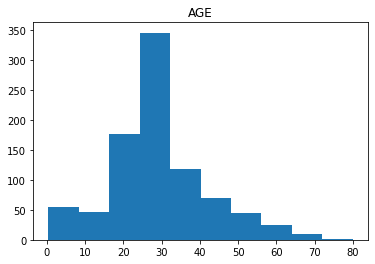

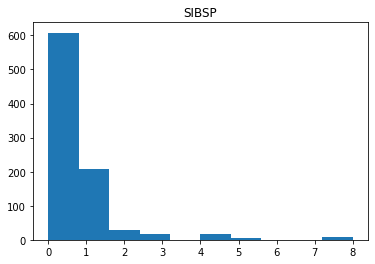

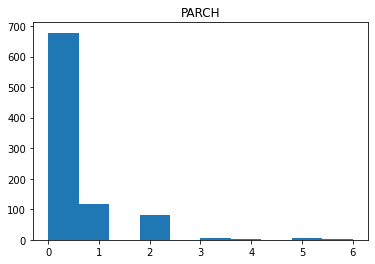

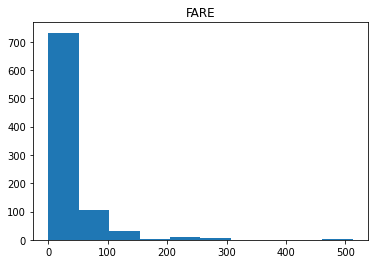

In [9]:
# histograms of numerical data

for column in ['AGE', 'SIBSP', 'PARCH', 'FARE']:
  plt.hist(titanic_df[column])
  plt.title(column)
  plt.show()

We can see that number of parents/children correlates with number of siblings/spuses on board. There are also light correlations between fare and age, number of siblings/spouses or parents/children. Age has a light negative correlation with number of siblings/spouses or parents/children.

            AGE     SIBSP     PARCH      FARE
AGE    1.000000 -0.232625 -0.179191  0.091566
SIBSP -0.232625  1.000000  0.414838  0.159651
PARCH -0.179191  0.414838  1.000000  0.216225
FARE   0.091566  0.159651  0.216225  1.000000


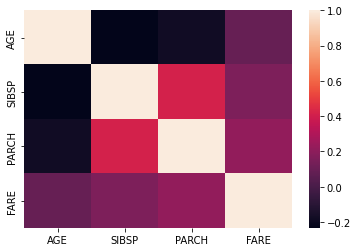

In [10]:
print(titanic_df[['AGE', 'SIBSP', 'PARCH', 'FARE']].corr())
sns.heatmap(titanic_df[['AGE', 'SIBSP', 'PARCH', 'FARE']].corr())

From the categorical graphs below we cen see:
* Most people didnt survive (survival rate is 38%)
* Most passengers traveled in 3rd class. Number of passengers in 1st and 2nd class is similar
* around 2/3 of passengers were male
* most passengers embarked in Southampton

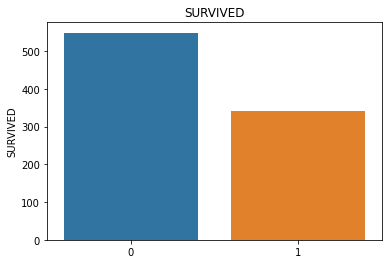

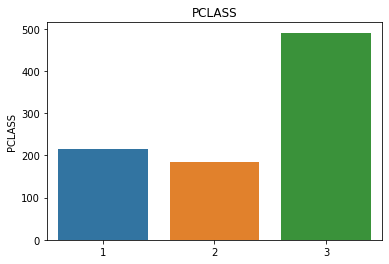

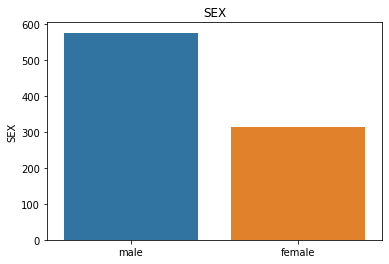

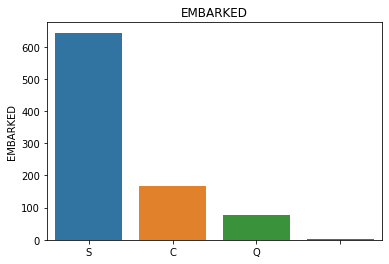

In [11]:
for column in ['SURVIVED', 'PCLASS', 'SEX', 'EMBARKED']:
  sns.barplot(x=titanic_df[column].value_counts().index, y=titanic_df[column].value_counts())
  plt.title(column)
  plt.show()

### Correlations between survival and other variables
* Women had much greater chance of surviving than men
* First class and high fare had greater chance of surviving
* 3rd class passengers had much smaller chances of surviving
* Emarkation in Cherbourgh has positive correlation with survival
* Emarkation in Southampton has negative correlation with survival
* Age has a slight negative correlation with survival


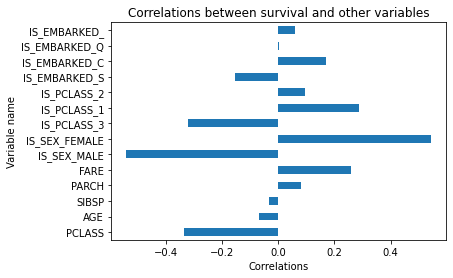

In [12]:
corr_df = titanic_df.corr()['SURVIVED']
corr_df = corr_df.drop(['PASSENGERID','SURVIVED'])

plot = corr_df.plot(kind='barh',
                    title='Correlations between survival and other variables',
                    legend=False)

plot.set_xlabel('Correlations'); 
plot.set_ylabel('Variable name');

In [13]:
survived_df = titanic_df.loc[titanic_df['SURVIVED'] == 1, :]
died_df = titanic_df.loc[titanic_df['SURVIVED'] == 0, :]

### Age distribution by survival

The median of age seems to be similar for people who survived and died. However, age of people who survived has a greater spread. The youngest and oldest had a greater chance of survival.

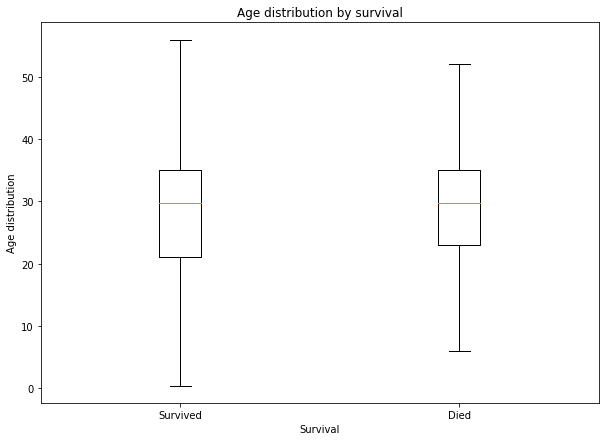

In [14]:
plt.figure(figsize=(10,7))
plt.boxplot([survived_df['AGE'], died_df['AGE']], sym=''); 
plt.title('Age distribution by survival');
plt.xticks([1,2], ['Survived', 'Died']);
plt.ylabel("Age distribution");
plt.xlabel("Survival");

# 3. Machine learning based survival prediction

Models used for prediction:
* Decision Tree
* Random Forest
* Logistic Regression



In [15]:
titanic_df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,IS_SEX_MALE,IS_SEX_FEMALE,IS_PCLASS_3,IS_PCLASS_1,IS_PCLASS_2,IS_EMBARKED_S,IS_EMBARKED_C,IS_EMBARKED_Q,IS_EMBARKED_
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S,True,False,True,False,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,True,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S,False,True,True,False,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,True,False,True,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S,True,False,True,False,False,True,False,False,False


In [16]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop(columns=['SURVIVED', 'PCLASS', 'NAME', 'SEX', 'TICKET', 'CABIN', 'EMBARKED'])
Y = titanic_df['SURVIVED']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('Y_train shape: ' + str(Y_train.shape))
print('Y_test shape: ' + str(Y_test.shape))

X_train shape: (712, 14)
X_test shape: (179, 14)
Y_train shape: (712,)
Y_test shape: (179,)


## Decision tree

Accuracy of the model: 81,6%

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

d_tree = DecisionTreeClassifier(max_depth=5)
d_tree = d_tree.fit(X_train, Y_train)

y_pred_tree = d_tree.predict(X_test)

print("Decision Tree accuracy: " + str(metrics.accuracy_score(Y_test, y_pred_tree)))

Decision Tree accuracy: 0.7932960893854749


From visualisation of the model, we can see that features that have the most impact on survival are: sex, price class, fare, age and number of siblings and spouses

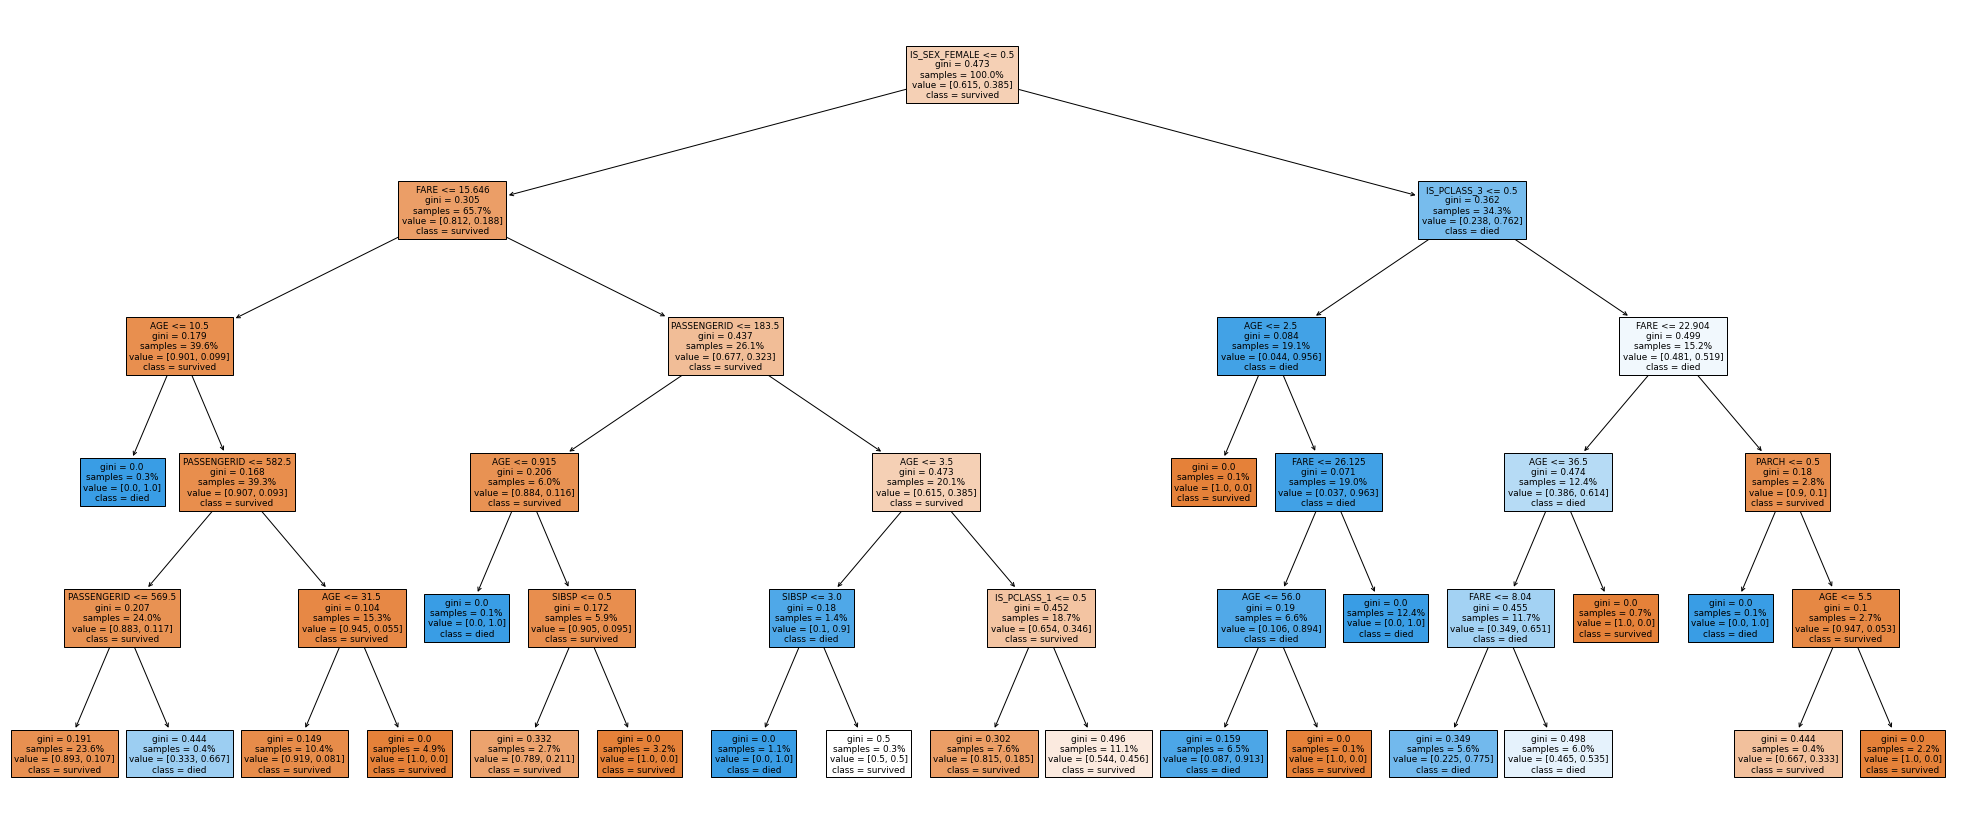

In [19]:
from sklearn import tree

plt.figure(figsize = (35,15));
tree.plot_tree(d_tree,
               feature_names=X_train.columns,
               class_names=['survived','died'],
               proportion=True,
               filled=True);

## Random Forest

Accuracy of the model: 81.6%

In [23]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(max_depth=3)
rand_forest.fit(X_train, Y_train)

y_pred_forest = rand_forest.predict(X_test)

print("Random Forest accuracy: " + str(metrics.accuracy_score(Y_test, y_pred_forest)))

Random Forest accuracy: 0.776536312849162


## Logistic Regression

Accuracy of the model: 76% 

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, Y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression accuracy: " + str(metrics.accuracy_score(Y_test, y_pred_log)))

Logistic Regression accuracy: 0.7597765363128491
